# Converting array coordinates to physical positions

If you find features of interest in the data for individual modules, these are likely to be located in *array coordinates* - e.g. module 5, centred at 57.1 pixels across and 32.8 pixels up.

You can use EXtra-geom to convert these array coordinates into physical (x, y, z) positions in metres in the assembled detector. There is also a separate method to get (x, y, z) coordinates for every pixel - see [Making masks](masks.ipynb) for that.

This example uses an AGIPD geometry, but the same method should work for other supported detectors. However, this method does not yet work for DSSC, due to complications with its hexagonal pixels.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from extra_geom import AGIPD_1MGeometry

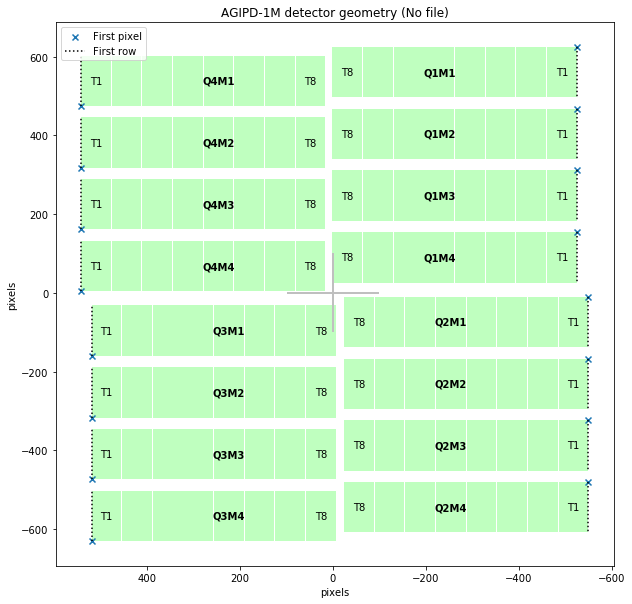

In [2]:
geom = AGIPD_1MGeometry.from_quad_positions(quad_pos=[
    (-525, 625),
    (-550, -10),
    (520, -160),
    (542.5, 475),
])
geom.inspect();

Coordinates within the module are described as *slow-scan* and *fast-scan* dimensions, referring to the order in which the data is stored. The 'First row' lines in the diagram above run along the fast-scan dimension for each module, with slow-scan = 0.

Let's generate 16 points in array coordinates.

In [3]:
# Place one point in each module
module_no = np.arange(0, 16)
# For AGIPD, slow-scan is the x dimension, increasing from the edges towards the centre
slow_scan = np.linspace(10, 500, num=16)
fast_scan = np.full(fill_value=40.1, shape=16)  # Fixed y position in each module

`geom.data_coords_to_positions()` converts these array positions into physical coordinates.
The points we generated above are plotted on top of the detector layout below.

positions.shape = (16, 3)


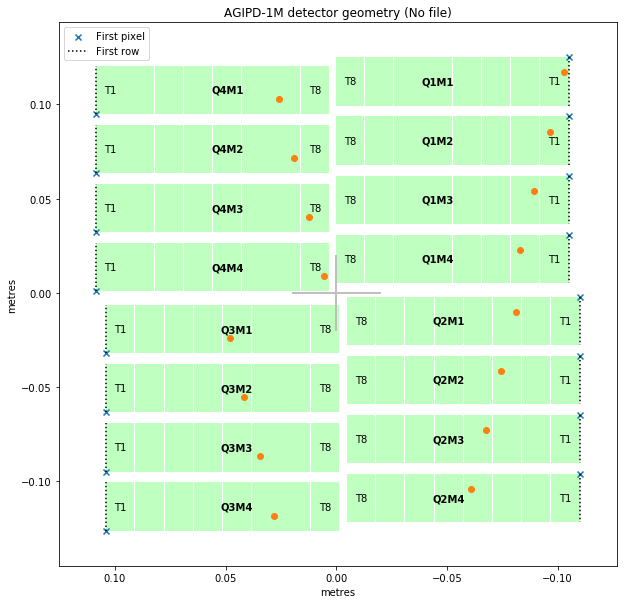

In [4]:
positions = geom.data_coords_to_positions(module_no, slow_scan, fast_scan)
print("positions.shape =", positions.shape)  # (point, x/y/z)

ax = geom.inspect(axis_units='m')

px = positions[:, 0]
py = positions[:, 1]

ax.scatter(px, py);